In [2]:
import xarray as xr
from eofs.xarray import Eof
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
fname = '/home/z3526974/Work/data/dipole_work/IMOS_altimetry_EAC_region_1993_2019/IMOS_aggregation_20190307T030559Z.nc'
ds = xr.open_dataset(fname)
# interpolate to daily
ds = ds.resample(TIME='1D').interpolate('linear')

In [4]:
ds

<xarray.Dataset>
Dimensions:     (LATITUDE: 36, LONGITUDE: 31, TIME: 9532)
Coordinates:
  * TIME        (TIME) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-02-05
  * LONGITUDE   (LONGITUDE) float32 150.0 150.2 150.4 ... 155.6 155.8 156.0
  * LATITUDE    (LATITUDE) float32 -37.0 -36.8 -36.6 -36.4 ... -30.4 -30.2 -30.0
Data variables:
    start_time  (TIME) float64 7.246e+17 7.249e+17 ... 1.548e+18 1.548e+18
    end_time    (TIME) float64 7.271e+17 7.27e+17 ... 1.55e+18 1.551e+18
    GSLA        (TIME, LATITUDE, LONGITUDE) float64 -0.05936 -0.03922 ... 0.1177
    GSL         (TIME, LATITUDE, LONGITUDE) float64 1.953 1.975 ... 2.671 2.688
    UCUR        (TIME, LATITUDE, LONGITUDE) float64 -0.0264 -0.03952 ... -0.3885
    VCUR        (TIME, LATITUDE, LONGITUDE) float64 -0.06806 -0.1762 ... -0.1012

In [5]:
coslat = np.cos(np.deg2rad(ds.coords['LATITUDE'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(ds.GSL, weights=wgts)

In [14]:
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofs(neofs=5)
pc1 = solver.pcs(npcs=2, pcscaling=1)
eof_frac=solver.varianceFraction()
eof_frac

<xarray.DataArray 'variance_fractions' (mode: 1116)>
array([1.799833e-01, 1.636075e-01, 1.234538e-01, ..., 1.693393e-11,
       1.679531e-11, 1.662331e-11])
Coordinates:
  * mode     (mode) int64 0 1 2 3 4 5 6 7 ... 1109 1110 1111 1112 1113 1114 1115
Attributes:
    long_name:  variance_fractions

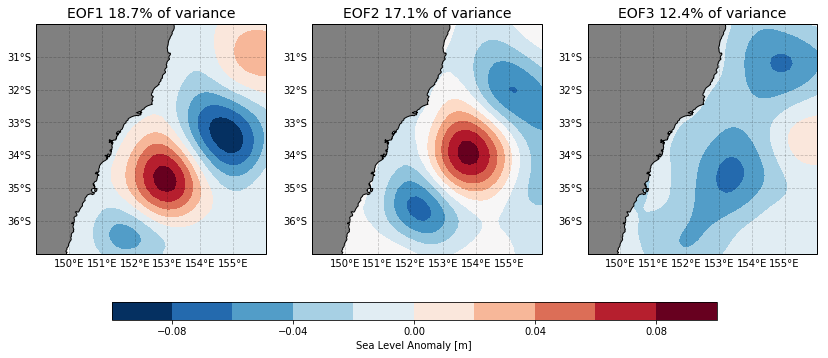

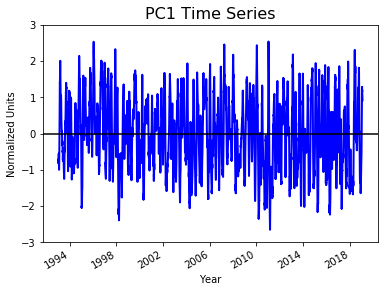

In [15]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')

clevs = np.linspace(-.1, .1, 11)

fig = plt.figure(figsize=(14,5))
ax = plt.subplot(1,3,1,projection=ccrs.PlateCarree())

feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False,
                             transform=ccrs.PlateCarree())
ax.set_extent([149, 156, -37, -30])
gl = ax.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_top = False
ax.set_title('EOF1 18.7% of variance', fontsize=14)

ax = plt.subplot(1,3,2,projection=ccrs.PlateCarree())

feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')
fill = eof1[1].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False,
                             transform=ccrs.PlateCarree())
ax.set_extent([149, 156, -37, -30])
gl = ax.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_top = False
ax.set_title('EOF2 17.1% of variance', fontsize=14)

ax = plt.subplot(1,3,3,projection=ccrs.PlateCarree())

feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')
fill = eof1[2].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False,
                             transform=ccrs.PlateCarree())
ax.set_extent([149, 156, -37, -30])
gl = ax.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_top = False
ax.set_title('EOF3 12.4% of variance', fontsize=14)

cbar_ax = fig.add_axes([0.2, -0.0, .6, .05]) #left, bottom, width, height
fig.colorbar(fill, cax=cbar_ax, orientation="horizontal",extend='both')
plt.xlabel('Sea Level Anomaly [m]')
# Plot the leading PC time series.
plt.figure()
pc1[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)
# savefig('SLA_EOF1_3.png', dpi=300,bbox_inches='tight')
plt.show()

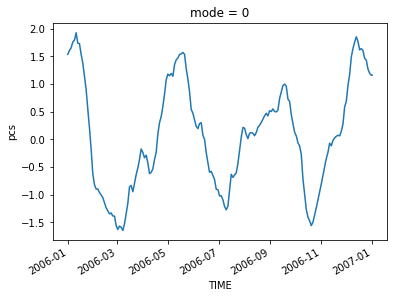

In [17]:
pc1[:,0].sel(TIME=slice('2006-01-01','2007-01-01')).plot()

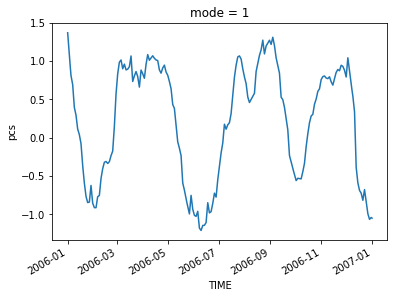

In [18]:
pc1[:,1].sel(TIME=slice('2006-01-01','2007-01-01')).plot()

## Now do the same for MADT

In [7]:
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# # leading PC time series itself.
# solver = Eof(ds.GSL, weights=wgts)

# eof1 = solver.eofs(neofs=5)
# pc1 = solver.pcs(npcs=1, pcscaling=1)
# eof_frac=solver.varianceFraction()
# eof_frac

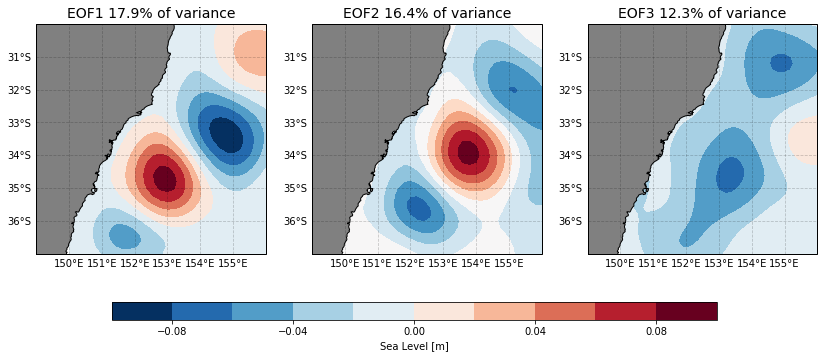

In [8]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')

fig = plt.figure(figsize=(14,5))
ax = plt.subplot(1,3,1,projection=ccrs.PlateCarree())

feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False,
                             transform=ccrs.PlateCarree())
ax.set_extent([149, 156, -37, -30])
gl = ax.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_top = False
ax.set_title('EOF1 17.9% of variance', fontsize=14)

ax = plt.subplot(1,3,2,projection=ccrs.PlateCarree())

feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')
fill = eof1[1].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False,
                             transform=ccrs.PlateCarree())
ax.set_extent([149, 156, -37, -30])
gl = ax.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_top = False
ax.set_title('EOF2 16.4% of variance', fontsize=14)

ax = plt.subplot(1,3,3,projection=ccrs.PlateCarree())

feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')
fill = eof1[2].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False,
                             transform=ccrs.PlateCarree())
ax.set_extent([149, 156, -37, -30])
gl = ax.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_top = False
ax.set_title('EOF3 12.3% of variance', fontsize=14)

cbar_ax = fig.add_axes([0.2, -0.0, .6, .05]) #left, bottom, width, height
fig.colorbar(fill, cax=cbar_ax, orientation="horizontal",extend='both')
plt.xlabel('Sea Level [m]')
# # Plot the leading PC time series.
# plt.figure()
# pc1[:, 0].plot(color='b', linewidth=2)
# ax = plt.gca()
# ax.axhline(0, color='k')
# ax.set_ylim(-3, 3)
# ax.set_xlabel('Year')
# ax.set_ylabel('Normalized Units')
# ax.set_title('PC1 Time Series', fontsize=16)
savefig('SL_EOF1_3.png', dpi=300,bbox_inches='tight')
plt.show()

## Plot the first 2 PC's